In [50]:
%pip install opencv-python

%pip install opencv-python-headless



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
import numpy as np

import matplotlib.pyplot as plt

import cv2

In [52]:
import cv2.version


print(cv2.__version__)

4.10.0


In [53]:
def read_barcode(cropped_img):
    # 0 means narrow, 1 means wide
    NARROW = "0"
    WIDE = "1"
    code11_widths = {
        "00110": "Stop/Start",
        "10001": "1",
        "01001": "2",
        "11000": "3",
        "00101": "4",
        "10100": "5",
        "01100": "6",
        "00011": "7",
        "10010": "8",
        "10000": "9",
        "00001": "0",
        "00100": "-",
    }

    # Get the average of each column in your image
    mean = cropped_img.mean(axis=0)

    # Set it to black or white based on its value
    mean[mean <= 127] = 1
    mean[mean > 128] = 0

    # Convert to string of pixels in order to loop over it
    pixels = ''.join(mean.astype(np.uint8).astype(str))

    # Need to figure out how many pixels represent a narrow bar
    narrow_bar_size = 0
    for pixel in pixels:
        if pixel == "1":
            narrow_bar_size += 1
        else:
            break

    wide_bar_size = narrow_bar_size * 2

    digits = []
    pixel_index = 0
    current_digit_widths = ""
    skip_next = False

    while pixel_index < len(pixels):

        if skip_next:
            pixel_index += narrow_bar_size
            skip_next = False
            continue

        count = 1
        try:
            while pixels[pixel_index] == pixels[pixel_index + 1]:
                count += 1
                pixel_index += 1
        except:
            pass
        pixel_index += 1

        current_digit_widths += NARROW if count == narrow_bar_size else WIDE

        if current_digit_widths in code11_widths:
            digits.append(code11_widths[current_digit_widths])
            current_digit_widths = ""
            skip_next = True  # Next iteration will be a separator, so skip it

    print(digits)

(600, 800, 3)


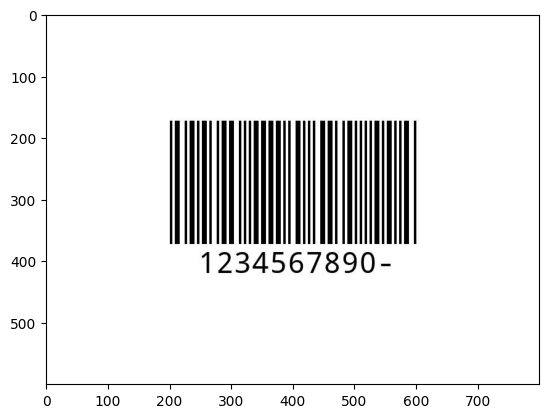

In [72]:
img=cv2.imread("TestCases/01 - lol easy.jpg")

print(img.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

(600, 800)


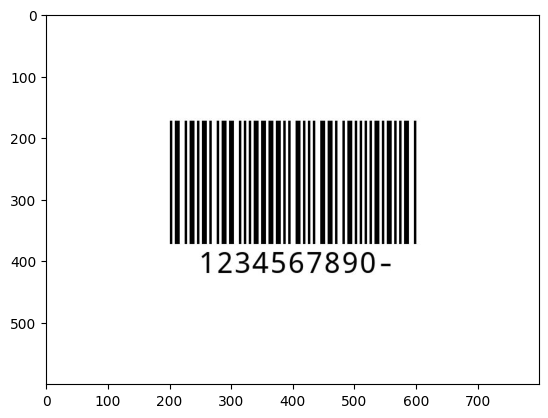

In [55]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
plt.imshow(img_gray,cmap='gray')

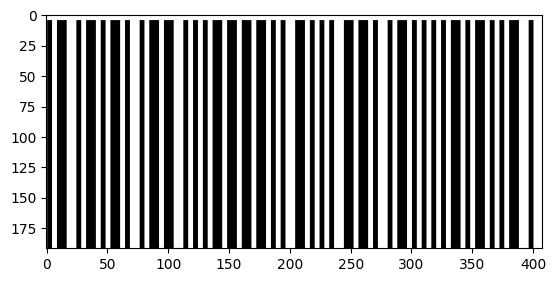

In [56]:
img_inverted=cv2.bitwise_not(img_gray)

x,y,w,h=cv2.boundingRect(img_inverted)

img_cropped=img_gray[y:y+h-h//4 ,x:x+w]

plt.imshow(img_cropped,cmap='gray')

In [57]:
  # 0 means narrow, 1 means wide
NARROW = "0"
WIDE = "1"
code11_widths = {
 "00110": "Stop/Start",
 "10001": "1",
 "01001": "2",
 "11000": "3",
 "00101": "4",
 "10100": "5",
 "01100": "6",
 "00011": "7",
 "10010": "8",
 "10000": "9",
 "00001": "0",
 "00100": "-",
}

In [58]:
# Get the average of each column in your image
mean = img_cropped.mean(axis=0)

    # Set it to black or white based on its value
mean[mean <= 127] = 1
mean[mean > 128] = 0

    # Convert to string of pixels in order to loop over it
pixels = ''.join(mean.astype(np.uint8).astype(str))
print(pixels)

011110000111111110000000011110000111111110000111100001111111100001111000000001111000011111111000011111111000000001111000011110000111100001111111100001111111100001111111100001111111100001111000011110000000011111111000011110000111100001111000000001111111100001111111100001111000000001111000011111111000011110000111100001111000011110000111111110000111100001111111100001111000011110000111111110000000011110000000


In [ ]:
  # Need to figure out how many pixels represent a narrow bar
narrow_bar_size = 0
for pixel in pixels:
        if pixel == "1":
            narrow_bar_size += 1
        else:
            break

wide_bar_size = narrow_bar_size * 2

digits = []
pixel_index = 0
current_digit_widths = ""
skip_next = False

while pixel_index < len(pixels):

        if skip_next:
            pixel_index += narrow_bar_size
            skip_next = False
            continue

        count = 1
        try:
            while pixels[pixel_index] == pixels[pixel_index + 1]:
                count += 1
                pixel_index += 1
        except:
            pass
        pixel_index += 1

        current_digit_widths += NARROW if count == narrow_bar_size else WIDE

        if current_digit_widths in code11_widths:
            digits.append(code11_widths[current_digit_widths])
            current_digit_widths = ""
            skip_next = True  # Next iteration will be a separator, so skip it

print(digits)

[]


In [73]:
read_barcode(img_cropped)

[]
